# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [45]:
Data = pd.read_csv('../raw-dataset/DiamondsPrices.csv')
Data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [46]:
Data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [48]:
Data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [49]:
jlh_duplikat=Data.duplicated().sum()
print('Jumlah Duplikat data', jlh_duplikat)

Jumlah Duplikat data 146


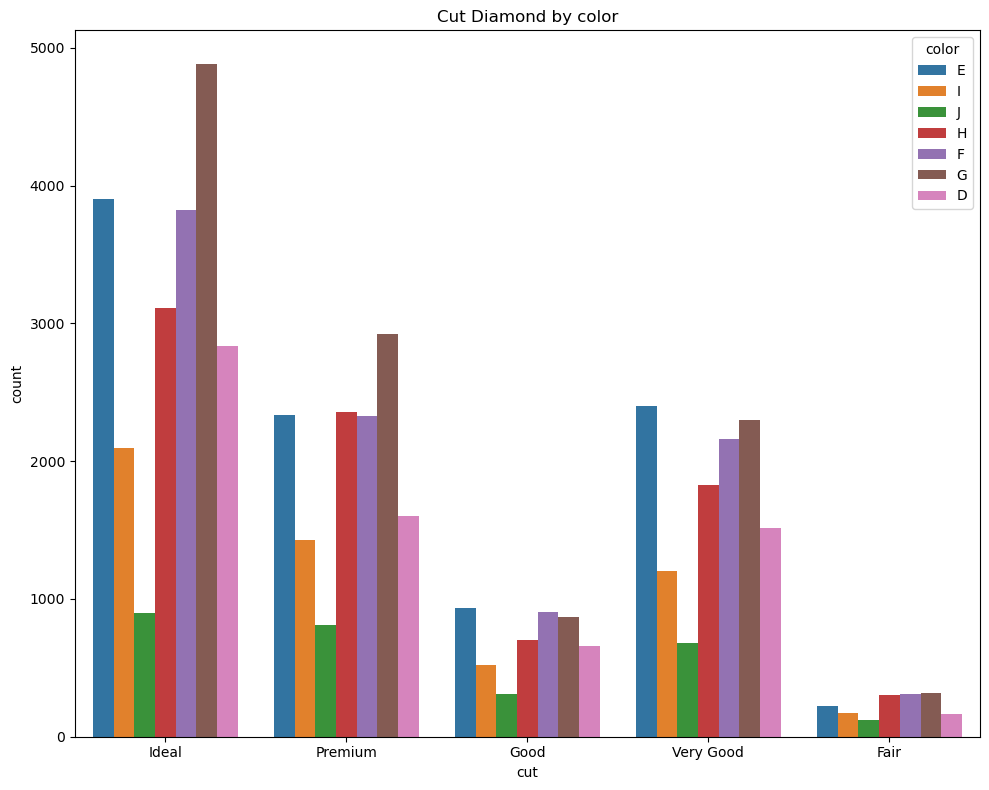

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(data=Data, x='cut',hue='color')
plt.title('Cut Diamond by color',fontsize=12)
plt.tight_layout()
plt.show()

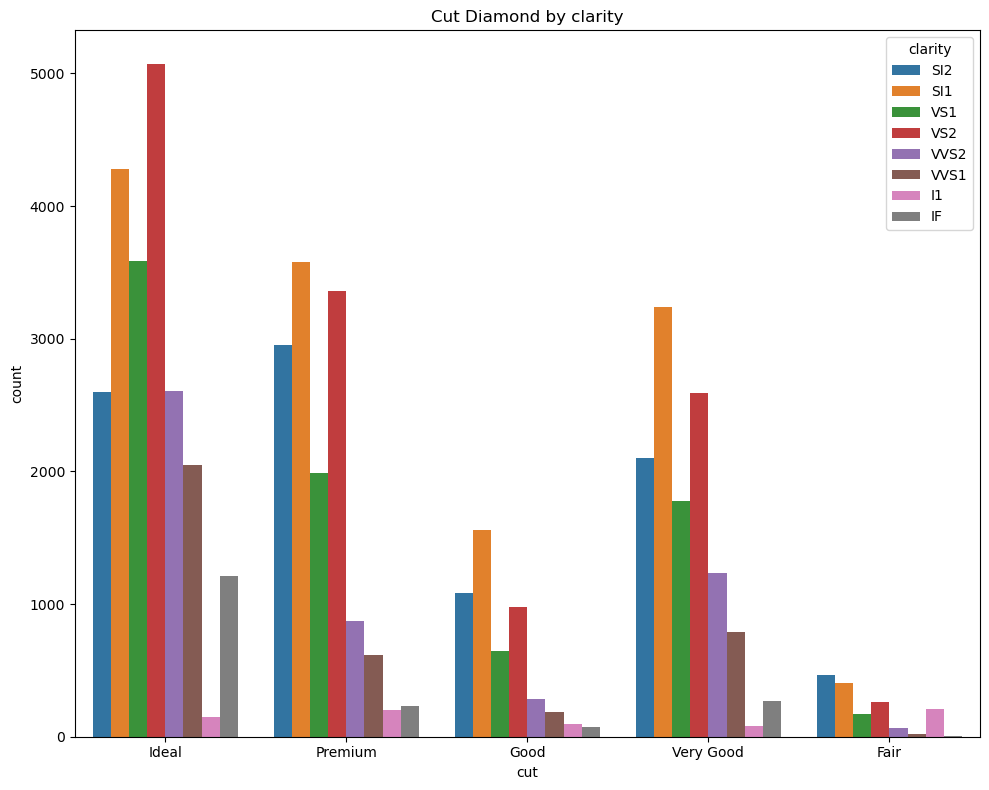

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(data=Data, x='cut',hue='clarity')
plt.title('Cut Diamond by clarity',fontsize=12)
plt.tight_layout()
plt.show()

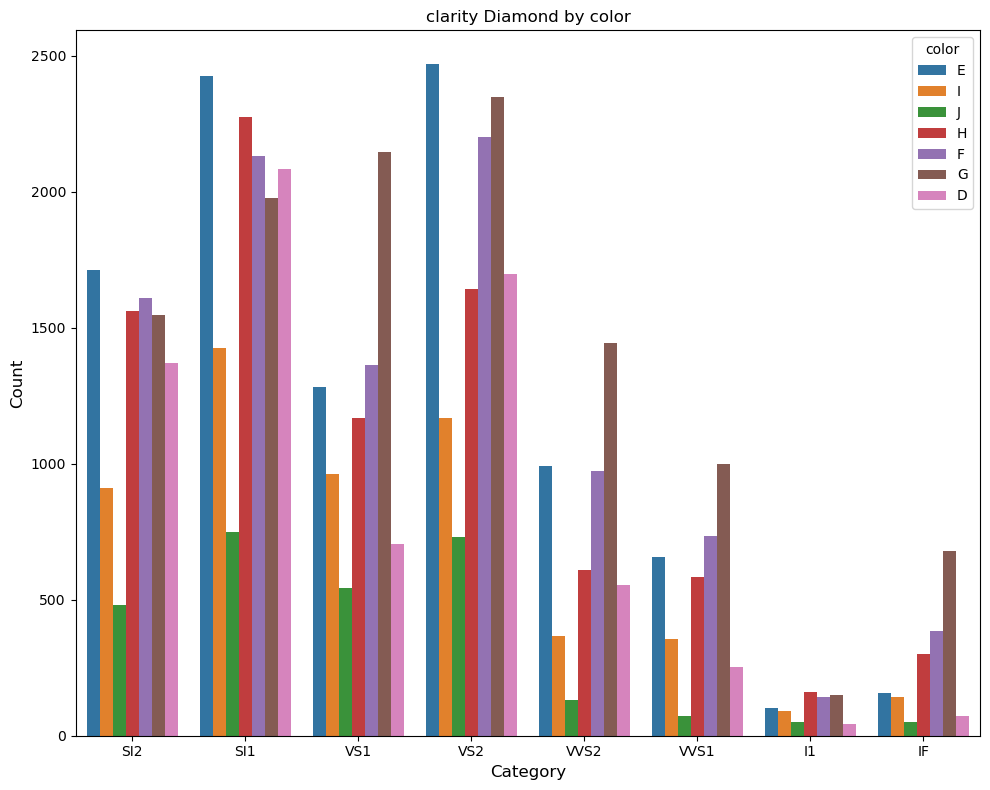

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data=Data, x='clarity',hue='color')
plt.title('clarity Diamond by color',fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

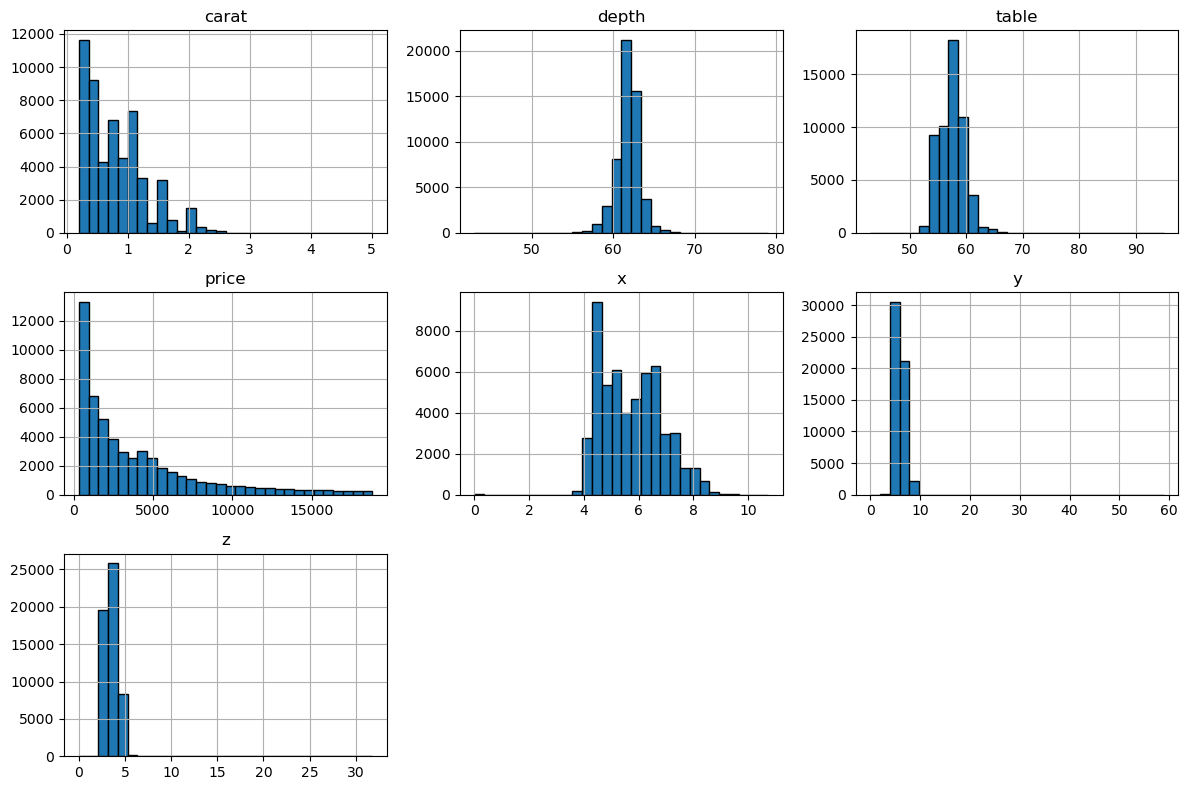

In [53]:
numerical_features=Data.select_dtypes(include='number')
numerical_features.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

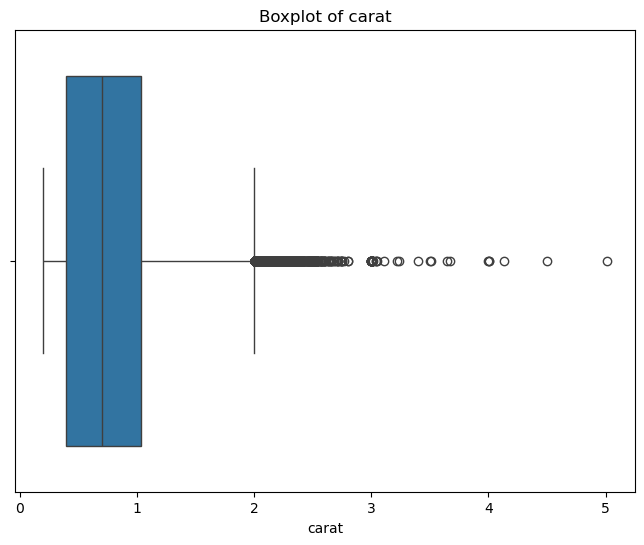

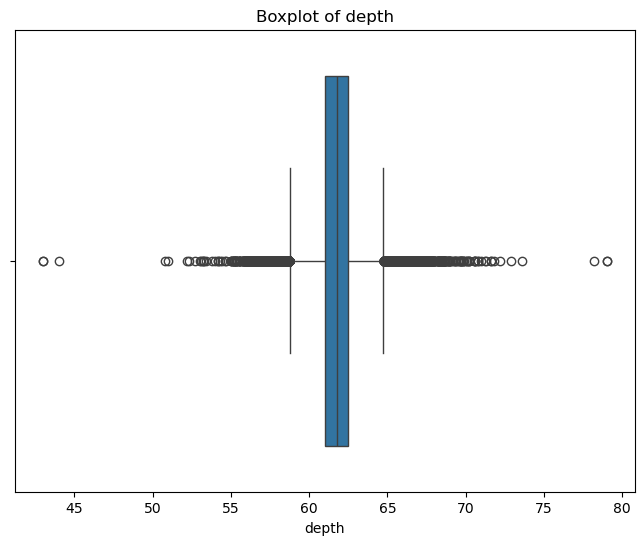

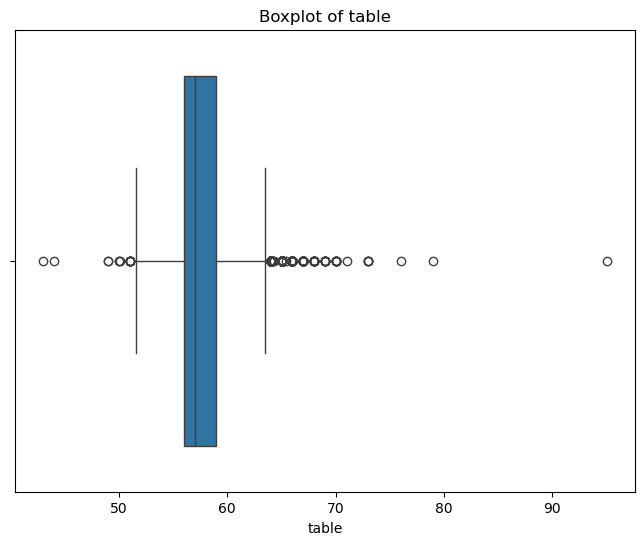

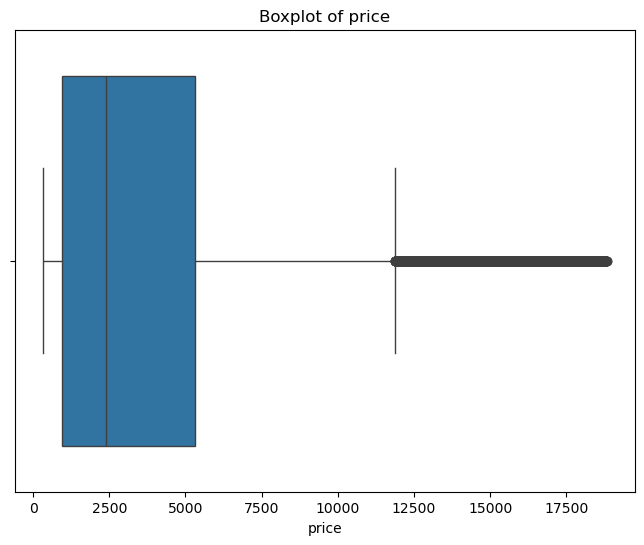

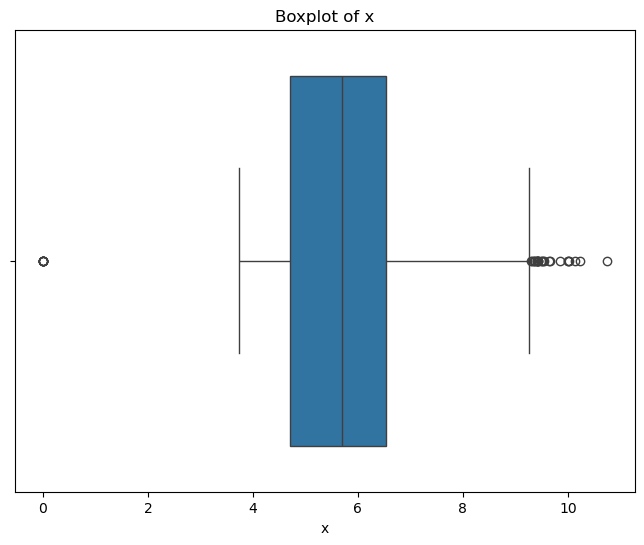

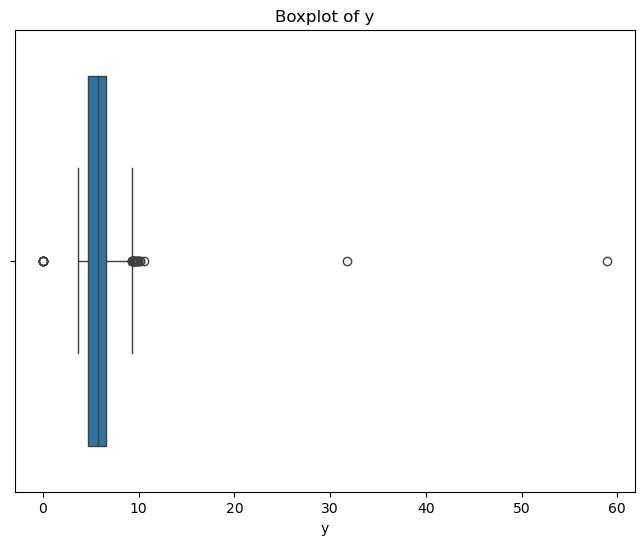

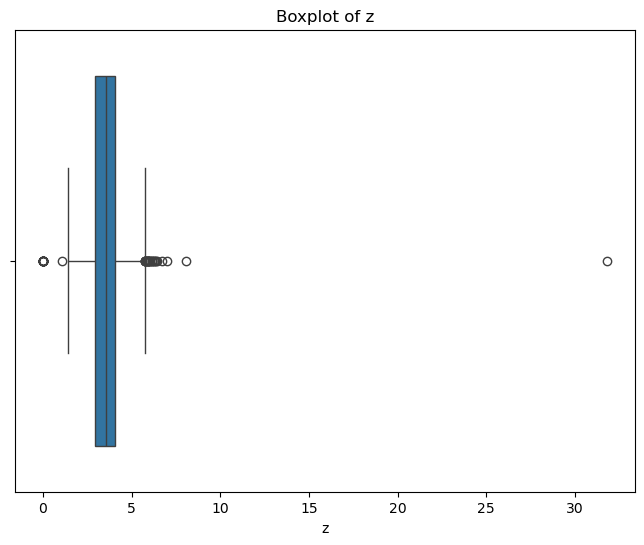

In [54]:
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=Data[feature])
    plt.title(f'Boxplot of {feature}')

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Melakukan Drop Duplikat

In [59]:
df_clean=Data.copy()

In [60]:
df_clean=Data.drop_duplicates()

Melakukan penanganan Outlier

In [62]:
def outlier_handling(df, columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1- 1.5 * IQR
            upper_bound=Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    df_cleaned = df_cleaned.reset_index(drop=True)
    return df_cleaned
df_clean=outlier_handling(df_clean,columns=['carat','depth','table','price','x','y','z'])

Encoding kategorikal feature

In [63]:
def encode_clarity(df):
    clarity_encoding={
        "I1" : 0,
        "SI2" : 1,
        "SI1" : 2,
        "VS2" : 3,
        "VS1" : 4,
        "VVS2" : 5,
        "VVS1" : 6,
        "IF" : 7,
    }
    df_encoded=df.copy()
    df_encoded['clarity']=df_encoded['clarity'].replace(clarity_encoding)
    return df_encoded

def encode_color(df):
    color_encoding={
        "D" : 6,
        "E" : 5,
        "F" : 4,
        "G" : 3,
        "H" : 2,
        "I" : 1,
        "J" : 0,
    }
    df_encoded=df.copy()
    df_encoded['color']=df_encoded['color'].replace(color_encoding)
    return df_encoded

def encode_cut(df):
    cut_encoding={
        "Fair" : 0,
        "Good" : 1,
        "Very Good" : 2,
        "Premium" : 3,
        "Ideal" : 4,
    }

    df_encoded=df.copy()
    df_encoded['cut']=df_encoded['cut'].replace(cut_encoding)
    return df_encoded
df_clean=encode_clarity(df_clean)
df_clean=encode_color(df_clean)
df_cleab=encode_cut(df_clean)

C:\Users\Juan\AppData\Local\Temp\ipykernel_18264\1408141272.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['clarity']=df_encoded['clarity'].replace(clarity_encoding)
C:\Users\Juan\AppData\Local\Temp\ipykernel_18264\1408141272.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['color']=df_encoded['color'].replace(color_encoding)
C:\Users\Juan\AppData\Local\Temp\ipykernel_18264\1408141272.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [65]:
df_clean.to_csv('DataClean.csv')